In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("crime_data.csv")
df.rename(columns = {"Unnamed: 0":"States"}, inplace=True)
df.head()
df1=df.copy()
df2=df.copy()
df.shape

(50, 5)

In [3]:
list(df)

['States', 'Murder', 'Assault', 'UrbanPop', 'Rape']

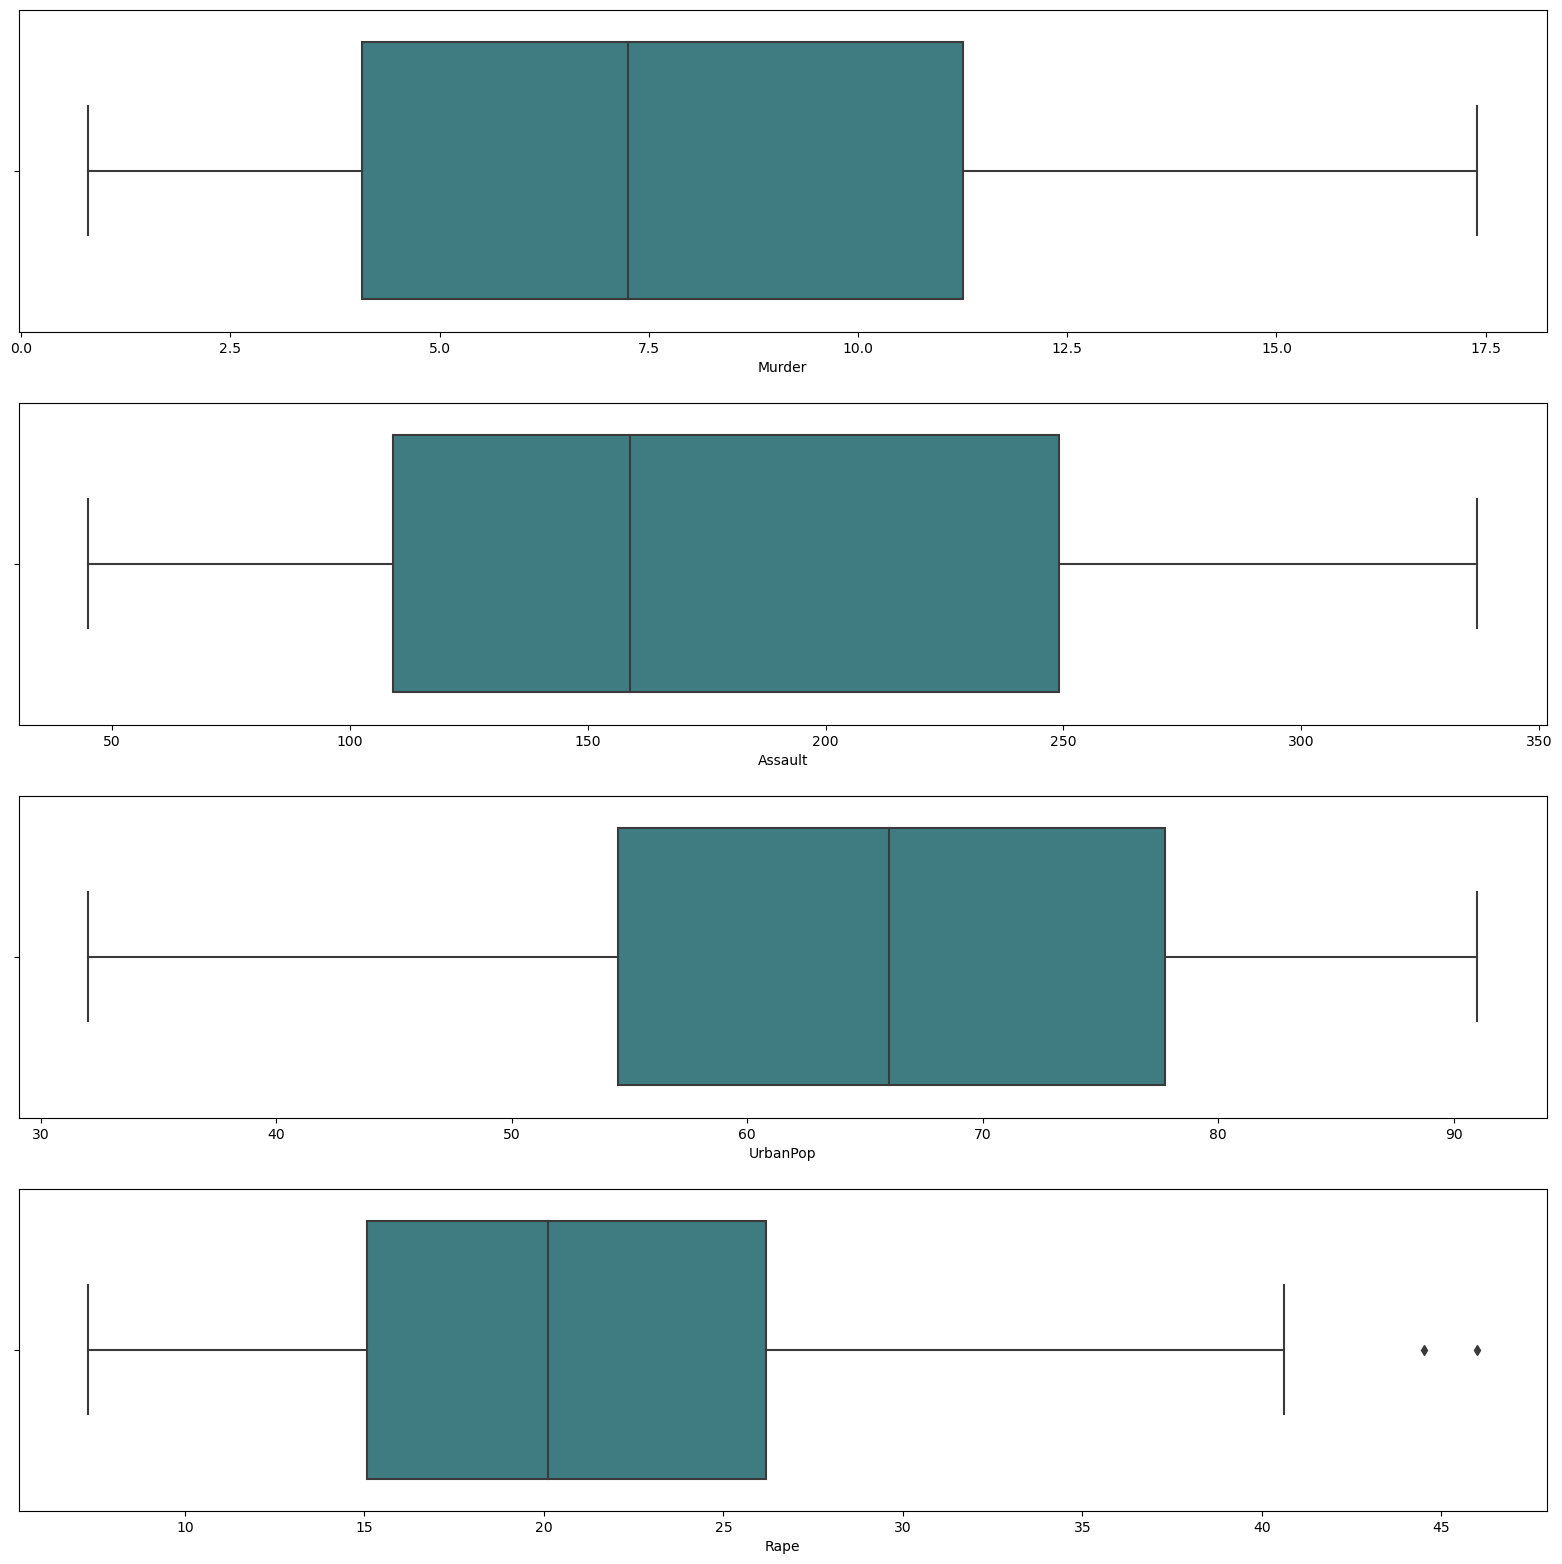

In [4]:
bp=df.copy()
fig, axes=plt.subplots(4,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=bp,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=bp,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=bp,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=bp,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

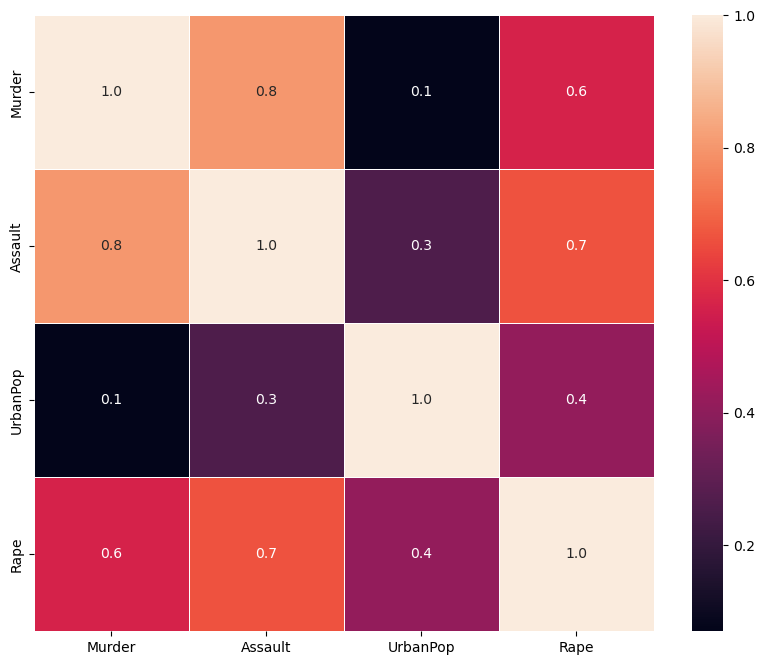

In [6]:
# Exclude the non-numeric column from correlation calculation
numeric_df = df.drop('States', axis=1)

# Correlation heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()


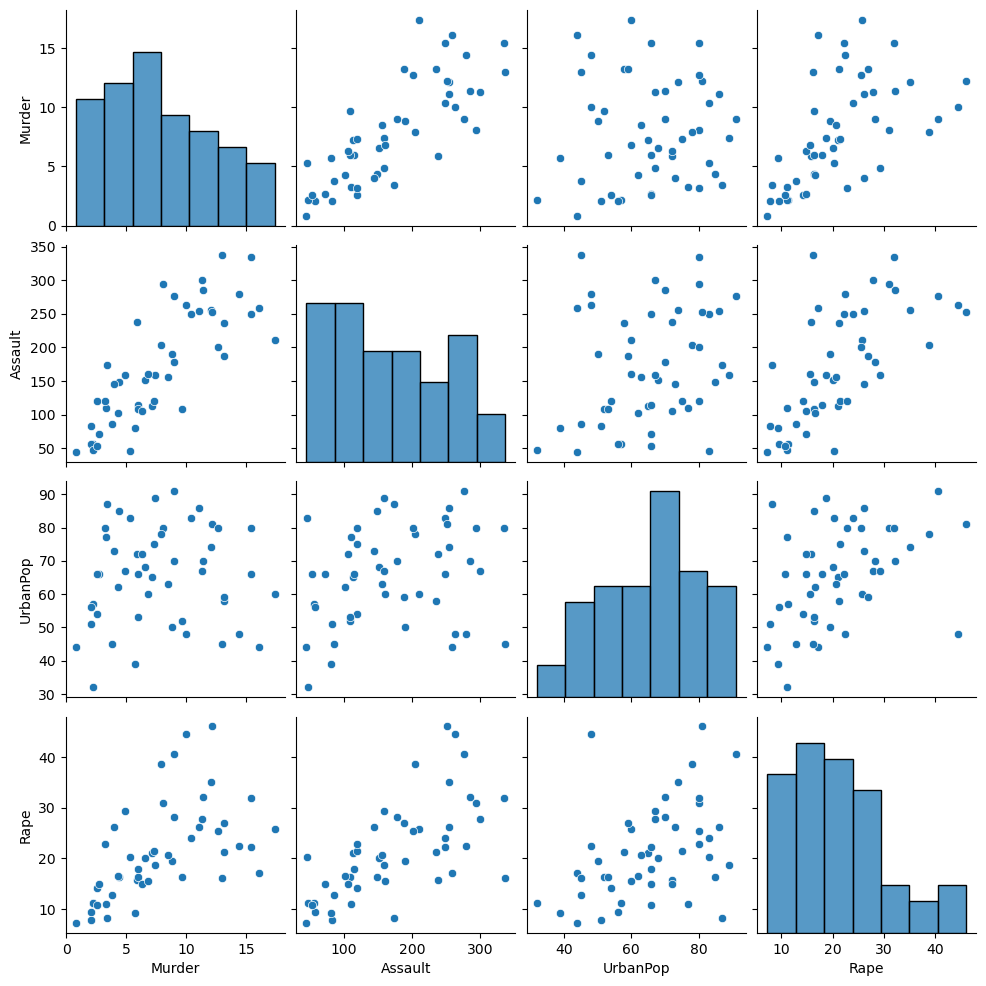

In [7]:
sns.pairplot(df)

In [8]:
#Standardizing Data
X1=df.iloc[:,1:5].copy()
X=df.iloc[:,1:5]
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
SS_X=SC.fit_transform(X)
SS_X=pd.DataFrame(SS_X)

SS_X.columns=list(X1)
X.isna().sum()
SS_X.head()


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


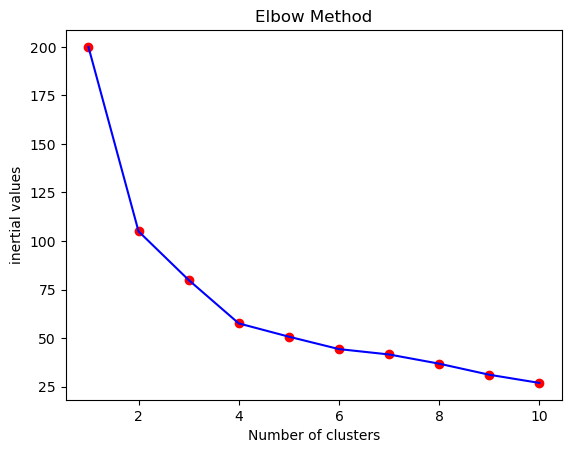

In [9]:
#K Means Method
#Elbow Method
from sklearn.cluster import KMeans
KMeans()

clust = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(SS_X)
    clust.append(kmeans.inertia_)

plt.plot(range(1,11),clust,color="blue")
plt.scatter(range(1, 11), clust,color="red")
plt.xlim()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

In [10]:
#KMeans Cluster algorithm using K=4
kmeans = KMeans(n_clusters=4,random_state=11)
# Fitting with inputs
Kmeans = kmeans.fit(X)
# Predicting the clusters
cluster_labels = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


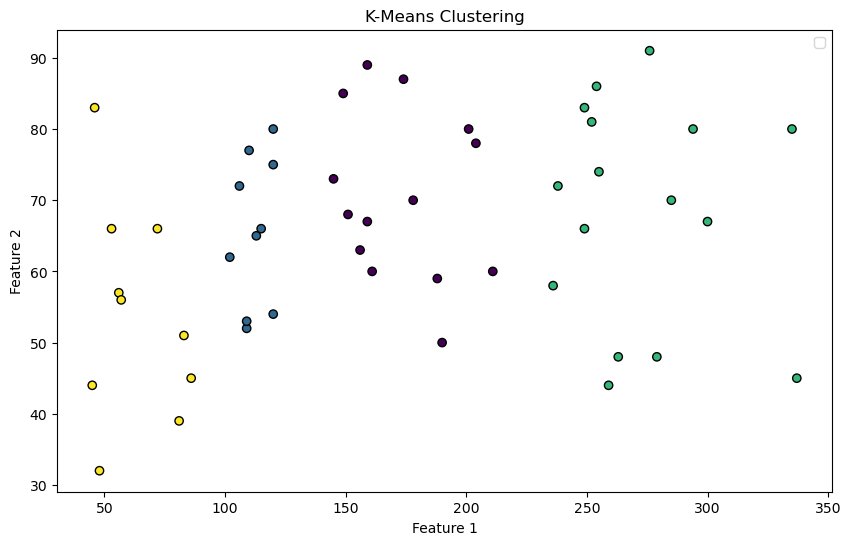

In [11]:
# Create a scatterplot to visualize the K-Means clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,1], X.iloc[:,2], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [12]:
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels.value_counts()
df1['Target1'] = cluster_labels
df1.head()

,States,Murder,Assault,UrbanPop,Rape,Target1
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


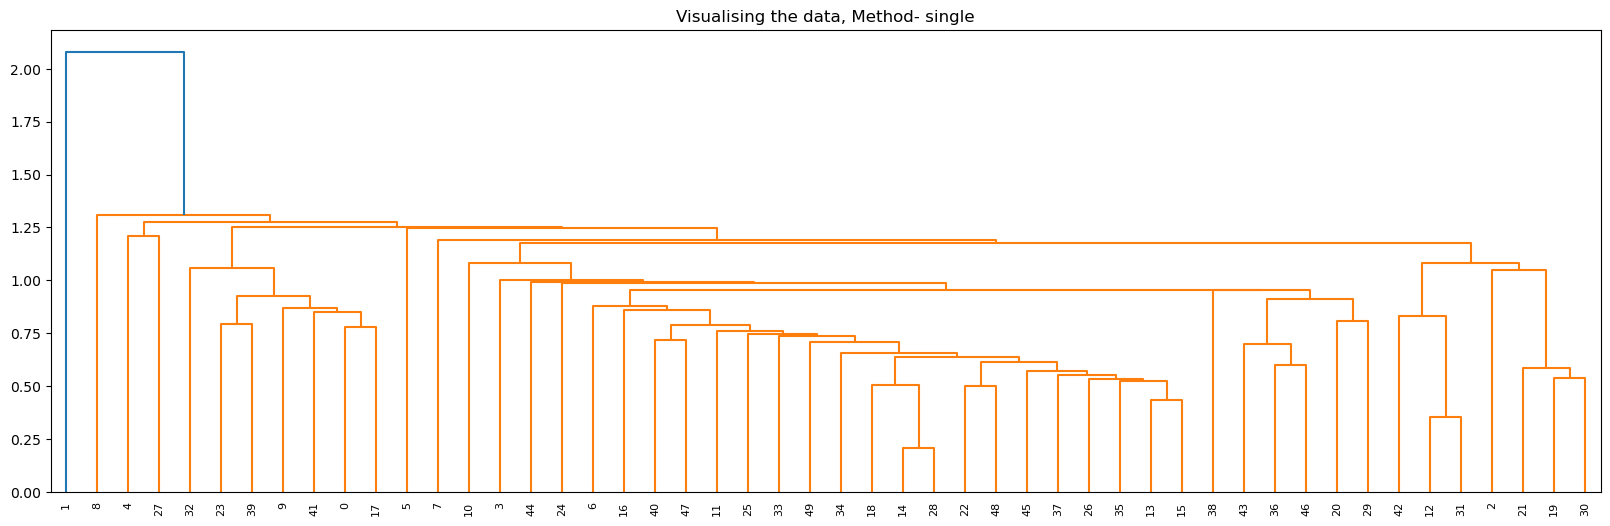

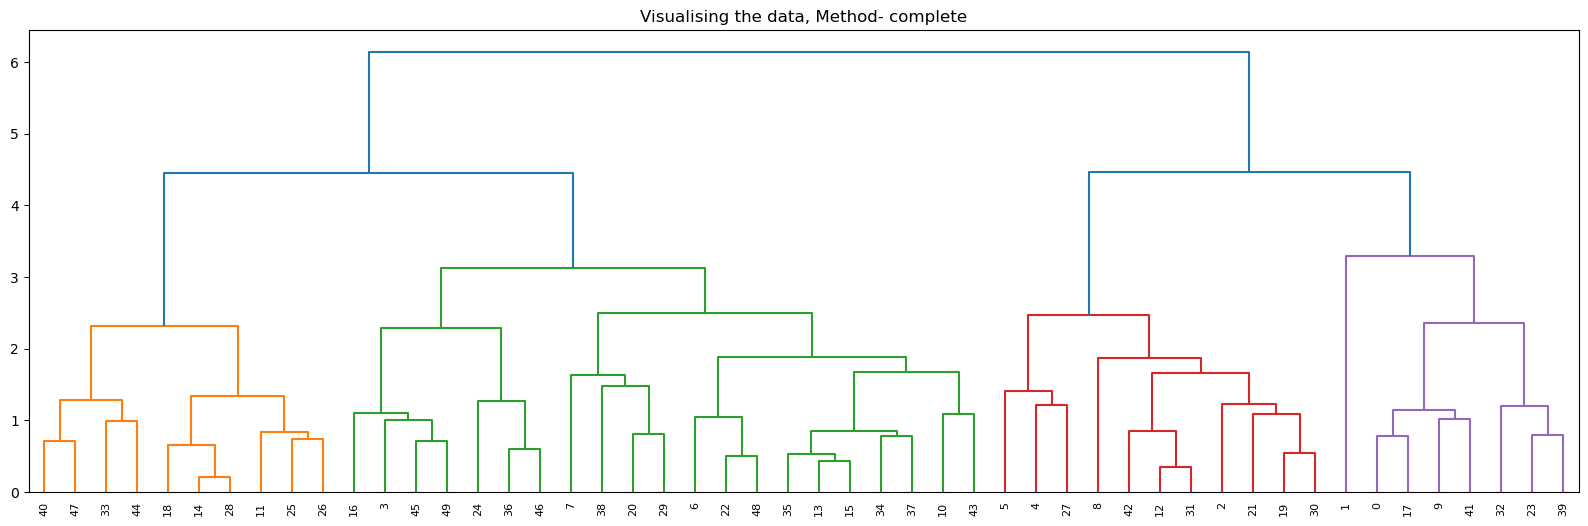

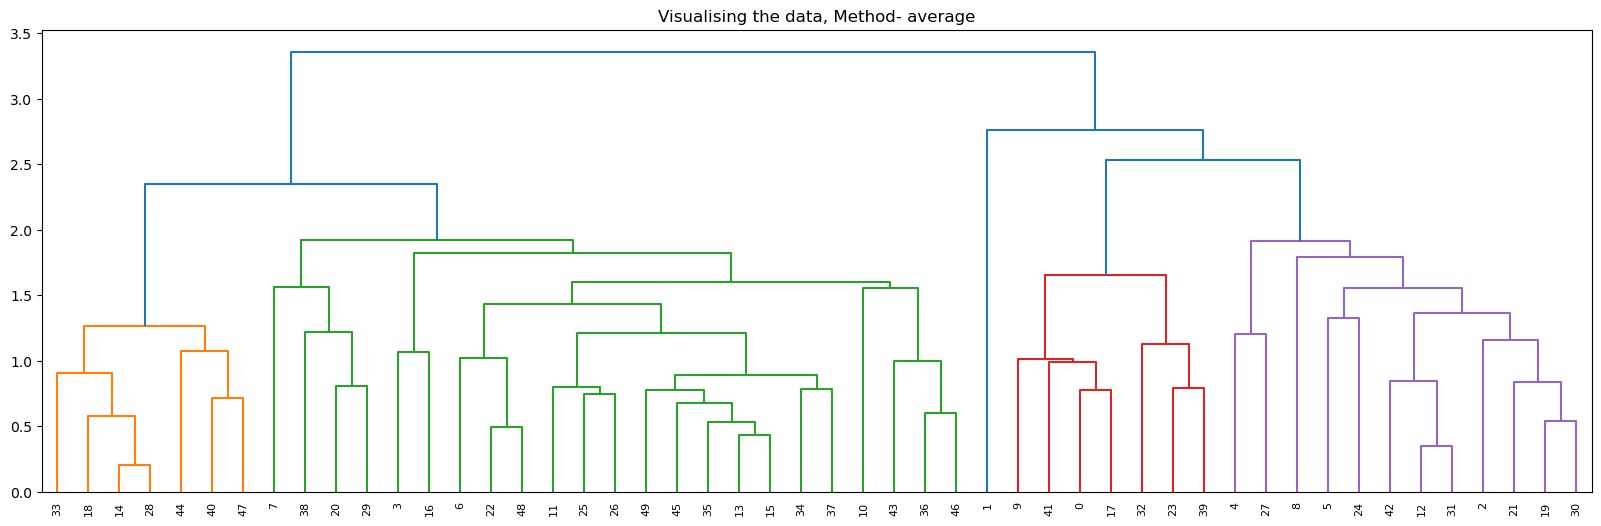

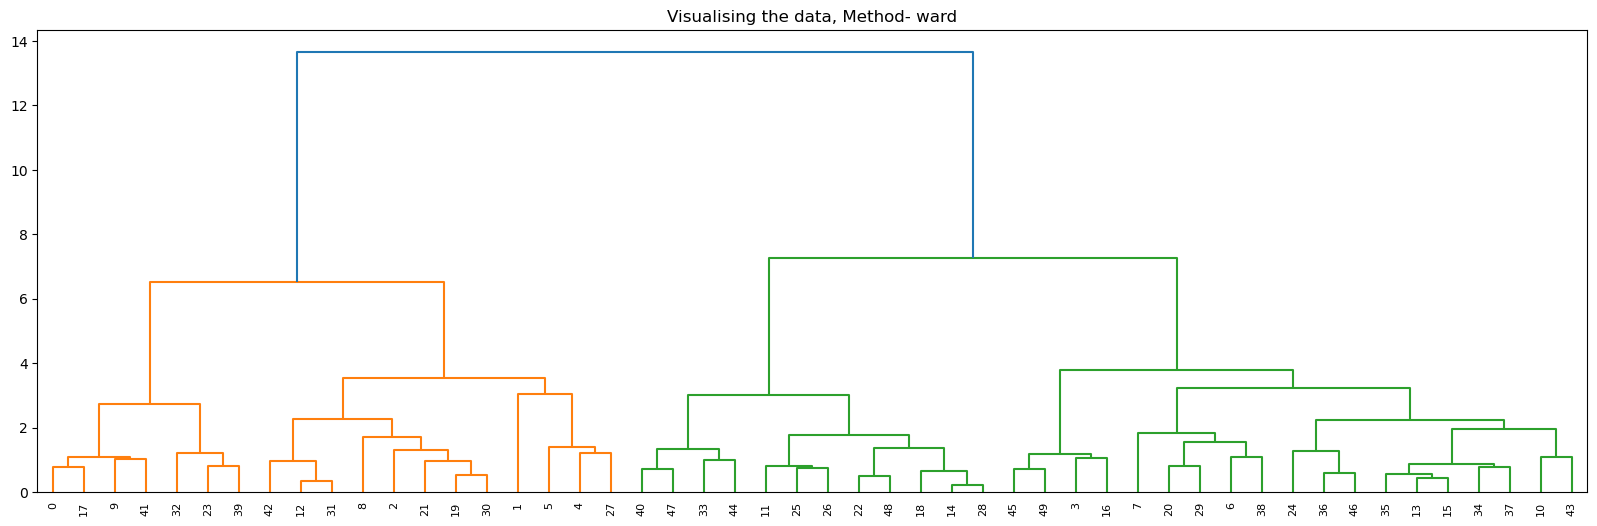

In [13]:
#Agglomeritive Clustering

import scipy.cluster.hierarchy as shc

for methods in ['single','complete','average','ward']:
   plt.figure(figsize =(20, 6))
   plt.title('Visualising the data, Method- {}'.format(methods))
   Dendrogram1 = shc.dendrogram(shc.linkage(SS_X, method = methods,optimal_ordering=False))

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(X)

Y = pd.DataFrame(Y)
Y.value_counts()
df2['Target2'] = Y
df2.head()

,States,Murder,Assault,UrbanPop,Rape,Target2
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [15]:
#DB Scan
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=3)

db.fit(SS_X)
df["DB_clusters"] = pd.DataFrame(db.labels_)

df["DB_clusters"].value_counts()

DB_clusters
 0    49
-1     1
Name: count, dtype: int64

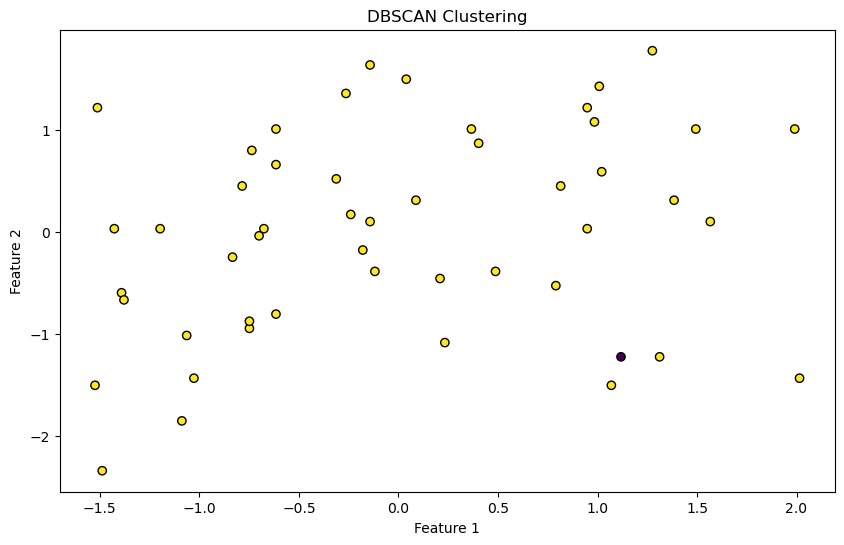

In [16]:
# Create a scatterplot to visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(SS_X.iloc[:, 1], SS_X.iloc[:, 2], c=db.labels_, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()